# Initialize

In [1]:
visible_devices = [2]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

sys.path.insert(0,'../utils_func/')
import MixtureDistributions # type: ignore

sys.path.insert(0,'../')
import GMetrics # type: ignore
from GMetrics.utils import se_mean, se_std, compute_exclusion_bisection, compute_exclusion_LR_bisection # type: ignore

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
from jetnet.evaluation import gen_metrics as JMetrics # type: ignore

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
    
results_dir = "../results/"
if not os.path.exists(results_dir):
    print("WARNING: Results directory does not exist")
    
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-04-05 11:07:17.112257: Importing os...
2024-04-05 11:07:17.112427: Importing sys...
Visible devices: [2]
2024-04-05 11:07:17.112744: Importing timer from timeit...
2024-04-05 11:07:17.112830: Setting env variables for tf import (only device(s) [2] will be available)...
2024-04-05 11:07:17.112992: Importing numpy...
2024-04-05 11:07:17.219956: Importing matplotlib...
2024-04-05 11:07:17.561320: Importing h5py...
2024-04-05 11:07:17.584347: Importing importlib.util...
2024-04-05 11:07:17.584458: Importing json...
2024-04-05 11:07:17.584520: Importing pandas...
2024-04-05 11:07:17.887328: Importing random...
2024-04-05 11:07:17.887504: Importing scipy utils...
2024-04-05 11:07:18.191099: Importing subprocess...
2024-04-05 11:07:18.191258: Importing tensorflow...
Tensorflow version: 2.12.0
2024-04-05 11:07:20.415932: Importing tensorflow_probability...
Tensorflow probability version: 0.20.1
2024-04-05 11:07:20.707718: Importing timeit...
2024-04-05 11:07:20.707837: Importing tqdm...
2

# Fixed $n=10000$

## Null hypotheses

### Model definition

In [2]:
seed = 0
ncomp = 10
ndims = 100
niter = 10_000
batch_size_test = 10_000
eps_loc = 0.
eps_scale = 0.
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mixture.Mixture'> <class 'tensorflow_probability.python.distributions.mixture.Mixture'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (100,) (100,)


In [3]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
null_hypotheses_dir = model_dir + "null_hypothesis/"
metrics_config_file = model_dir + "metrics_config.json"

In [4]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 10_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.


Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 100000000
batch_size 10000
niter 10000
niter * batch_size 100000000
small_sample False


In [5]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 1000,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 1000,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.
To run under the alternative hypothesis, set the `null_test` attribute to False.


### Set up tests and metrics configurations

In [6]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

test_config_null["ncomp"] = ncomp

pd.DataFrame([test_config_null])

,niter,batch_size_test,batch_size_gen,small_sample_threshold,dtype_input,seed,use_tf,mirror_strategy,strategy,verbose,...,ndims_1,nsamples_1,is_symb_2,ndims_2,nsamples_2,dtype,ndims,nsamples,small_sample,ncomp
0,10000,10000,10000,10000000,float64,0,True,False,None,True,...,100,0,True,100,0,float64,100,100000000,False,10


In [7]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncop_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"fn": {"name": "fn", # type: ignore
                                       "object_name": "FNMetric",
                                       "class_name": "GMetrics.FNMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns)/ndims,
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)/ndims",
                                       "test_config": test_config_null,
                                       "max_vectorize": 200,
                                       "latex": "$\overline{\|\cdot\|}_{F}$",
                                       "null_file": null_hypotheses_dir+"FN.json"},
                               "fpd": {"name": "fpd",
                                       "object_name": "FPDMetric",
                                       "class_name": "GMetrics.FPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: (ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: (ns/ndims)**(3/2)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 50,
                                       "latex": "$d_{\mathrm{FPD}}$",
                                       "null_file": null_hypotheses_dir+"FPD.json"},
                               "kpd": {"name": "kpd",
                                       "object_name": "KPDMetric" ,
                                       "class_name": "GMetrics.KPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: ns/np.sqrt(ndims),
                                       "scale_func_string": "lambda ns, ndims: ns/np.sqrt(ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 2,
                                       "latex": "$d_{\mathrm{KPD}}$",
                                       "null_file": null_hypotheses_dir+"KPD.json"},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTest",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 50,
                                       "latex": "$\overline{D}$",
                                       "null_file": null_hypotheses_dir+"KS.json"},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTest",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 1000, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 50,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": null_hypotheses_dir+"SKS.json"},
                               "swd": {"name": "swd",
                                       "object_name": "SWDMetric",
                                       "class_name": "GMetrics.SWDMetric", 
                                       "kwargs": {"nslices": 1000, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 50,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": null_hypotheses_dir+"SWD.json"},
                               "lr": {"name": "lr",
                                       "object_name": "LRMetric",
                                       "class_name": "GMetrics.LRMetric", 
                                       "kwargs": {"null_test": True},
                                       "result_key": "lik_ratio_norm_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 50,
                                       "latex": "$t_{\mu}$",
                                       "null_file": null_hypotheses_dir+"LR.json"}}}
metrics_config[unique_key]

{'fn': {'name': 'fn',
  'object_name': 'FNMetric',
  'class_name': 'GMetrics.FNMetric',
  'kwargs': {},
  'result_key': 'metric_list',
  'scale_func': <function __main__.<lambda>(ns, ndims)>,
  'scale_func_string': 'lambda ns, ndims: np.sqrt(ns)/ndims',
  'test_config': {'niter': 10000,
   'batch_size_test': 10000,
   'batch_size_gen': 10000,
   'small_sample_threshold': 10000000,
   'dtype_input': 'float64',
   'seed': 0,
   'use_tf': True,
   'mirror_strategy': False,
   'strategy': None,
   'verbose': True,
   'is_symb_1': True,
   'ndims_1': 100,
   'nsamples_1': 0,
   'is_symb_2': True,
   'ndims_2': 100,
   'nsamples_2': 0,
   'dtype': 'float64',
   'ndims': 100,
   'nsamples': 100000000,
   'small_sample': False,
   'ncomp': 10},
  'max_vectorize': 200,
  'latex': '$\\overline{\\|\\cdot\\|}_{F}$',
  'null_file': '../results/100D_10K/null_hypothesis/FN.json'},
 'fpd': {'name': 'fpd',
  'object_name': 'FPDMetric',
  'class_name': 'GMetrics.FPDMetric',
  'kwargs': {},
  'result_key

### Evaluate null hypotheses

In [8]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        obj.Test_tf(max_vectorize=max_vectorize)
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Loading fn from ../results/100D_10K/null_hypothesis/FN.json
Loading fpd from ../results/100D_10K/null_hypothesis/FPD.json
Loading kpd from ../results/100D_10K/null_hypothesis/KPD.json
Loading ks from ../results/100D_10K/null_hypothesis/KS.json
Loading sks from ../results/100D_10K/null_hypothesis/SKS.json
Loading swd from ../results/100D_10K/null_hypothesis/SWD.json


In [9]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[-1].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
metrics_config[unique_key]["lr"]["thresholds"] = []

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fn: [[0.68, [6800, 3199], 0.9190262949972976], [0.95, [9500, 500], 1.163020209902126], [0.99, [9900, 100], 1.3179537521716542]]
Computing time for metric fn: 86.22942784242332
ThresholdS for metric fpd: [[0.68, [6800, 3199], 2.125009796879998], [0.95, [9500, 500], 3.1122284633764514], [0.99, [9900, 100], 3.8631867185793047]]
Computing time for metric fpd: 11317.826824923977
ThresholdS for metric kpd: [[0.68, [6800, 3199], 0.04725440173825035], [0.95, [9500, 500], 0.10140783177847723], [0.99, [9900, 100], 0.1462337129392033]]
Computing time for metric kpd: 11293.07122381404
ThresholdS for metric ks: [[0.68, [6800, 3199], 0.9076427718802609], [0.95, [9500, 500], 1.0902174352707914], [0.99, [9900, 100], 1.212193802414268]]
Computing time for metric ks: 13499.59668414481
ThresholdS for metric sks: [[0.68, [6800, 3199], 0.903803078077085], [0.95, [9500, 500], 1.0769097338066926], [0.99, [9900, 100], 1.1813566708429235]]
Computing time for metric sks: 11106.058865776286

,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds
0,fn,FNMetric,GMetrics.FNMetric,{},metric_list,<function <lambda> at 0x7f5c0976f1c0>,"lambda ns, ndims: np.sqrt(ns)/ndims","{'niter': 10000, 'batch_size_test': 10000, 'ba...",200,$\overline{\|\cdot\|}_{F}$,../results/100D_10K/null_hypothesis/FN.json,"[[0.68, [6800, 3199], 0.9190262949972976], [0...."
1,fpd,FPDMetric,GMetrics.FPDMetric,{},metric_list,<function <lambda> at 0x7f5c0976f250>,"lambda ns, ndims: (ns/ndims)**(3/2)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",50,$d_{\mathrm{FPD}}$,../results/100D_10K/null_hypothesis/FPD.json,"[[0.68, [6800, 3199], 2.125009796879998], [0.9..."
2,kpd,KPDMetric,GMetrics.KPDMetric,{},metric_list,<function <lambda> at 0x7f5c0976f2e0>,"lambda ns, ndims: ns/np.sqrt(ndims)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",2,$d_{\mathrm{KPD}}$,../results/100D_10K/null_hypothesis/KPD.json,"[[0.68, [6800, 3199], 0.04725440173825035], [0..."
3,ks,KSTest,GMetrics.KSTest,{},statistic_means,<function <lambda> at 0x7f5c0976f370>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",50,$\overline{D}$,../results/100D_10K/null_hypothesis/KS.json,"[[0.68, [6800, 3199], 0.9076427718802609], [0...."
4,sks,SKSTest,GMetrics.SKSTest,"{'nslices': 1000, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f5c0976f400>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",50,$\widetilde{D}$,../results/100D_10K/null_hypothesis/SKS.json,"[[0.68, [6800, 3199], 0.903803078077085], [0.9..."
5,swd,SWDMetric,GMetrics.SWDMetric,"{'nslices': 1000, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f5c0976f490>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",50,$\widetilde{W}$,../results/100D_10K/null_hypothesis/SWD.json,"[[0.68, [6800, 3199], 0.3215222675610459], [0...."
6,lr,LRMetric,GMetrics.LRMetric,{'null_test': True},lik_ratio_norm_list,<function <lambda> at 0x7f5c0976f520>,"lambda ns, ndims: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",50,$t_{\mu}$,../results/100D_10K/null_hypothesis/LR.json,[]


### Plots of null-distributions

mu = 0.8432326548410783 +/- 0.0003337879816711959
sigma = 0.18269865398278004 +/- 0.0013402342789156528


/tmp/ipykernel_52275/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_52275/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_52275/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_52275/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


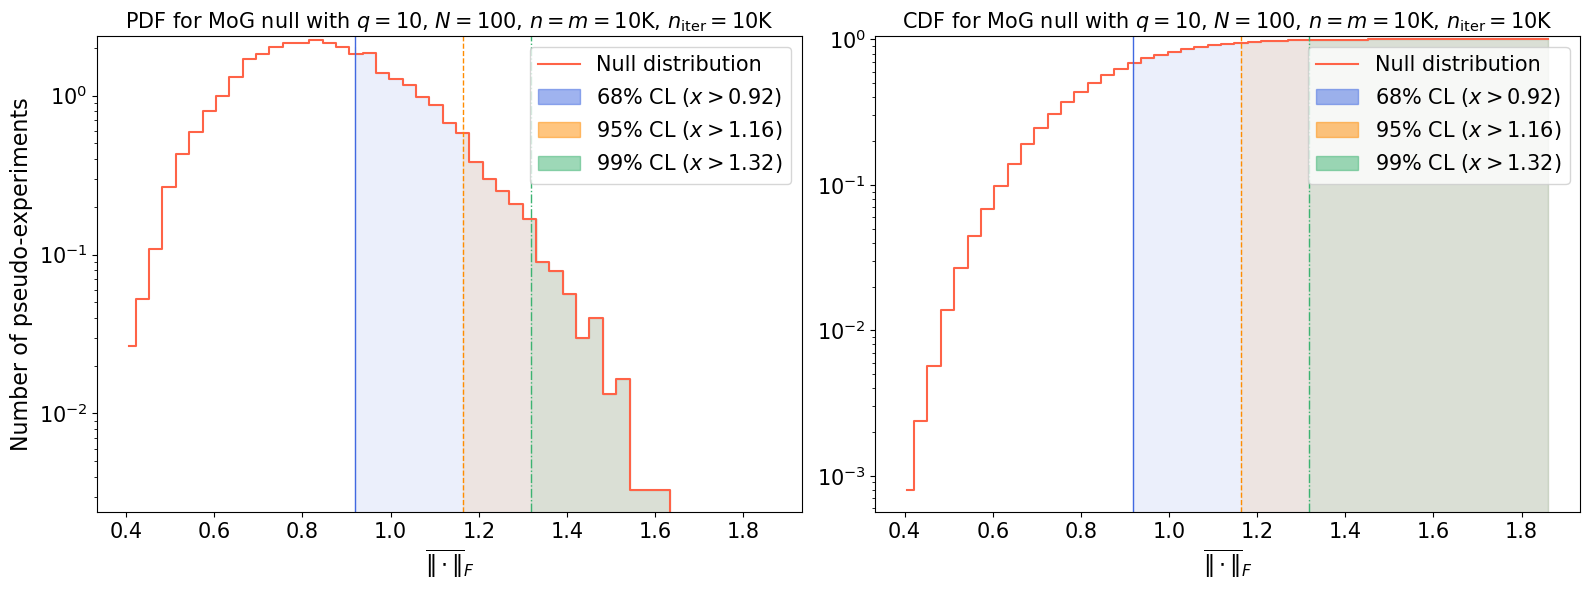

Time elapsed: 1.9618725515902042 seconds.
mu = 1.9131907561908106 +/- 0.004016520629899808
sigma = 0.6337602567138308 +/- 0.005627859249268887


/tmp/ipykernel_52275/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_52275/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_52275/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_52275/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


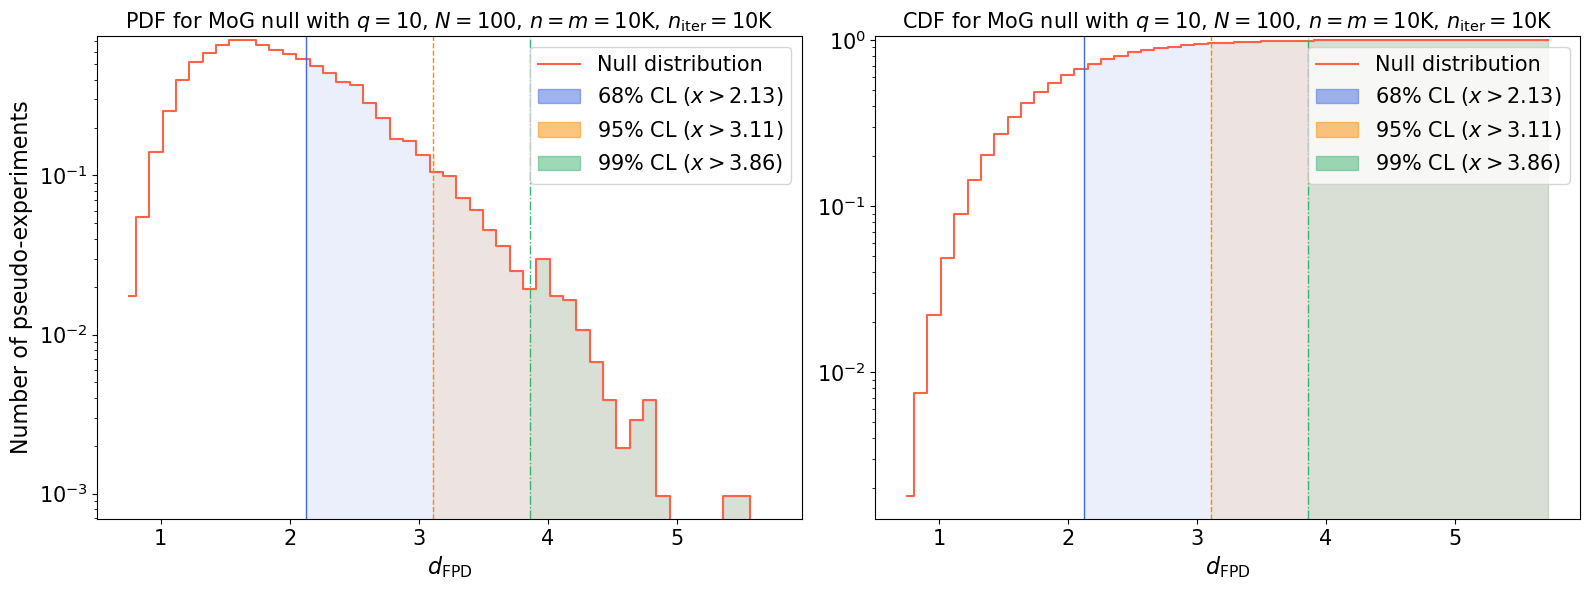

Time elapsed: 1.1142468303442001 seconds.
mu = 0.03605530506471508 +/- 1.2343630147842755e-05
sigma = 0.03513350274003826 +/- 0.00034228181192723996


/tmp/ipykernel_52275/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_52275/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_52275/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_52275/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


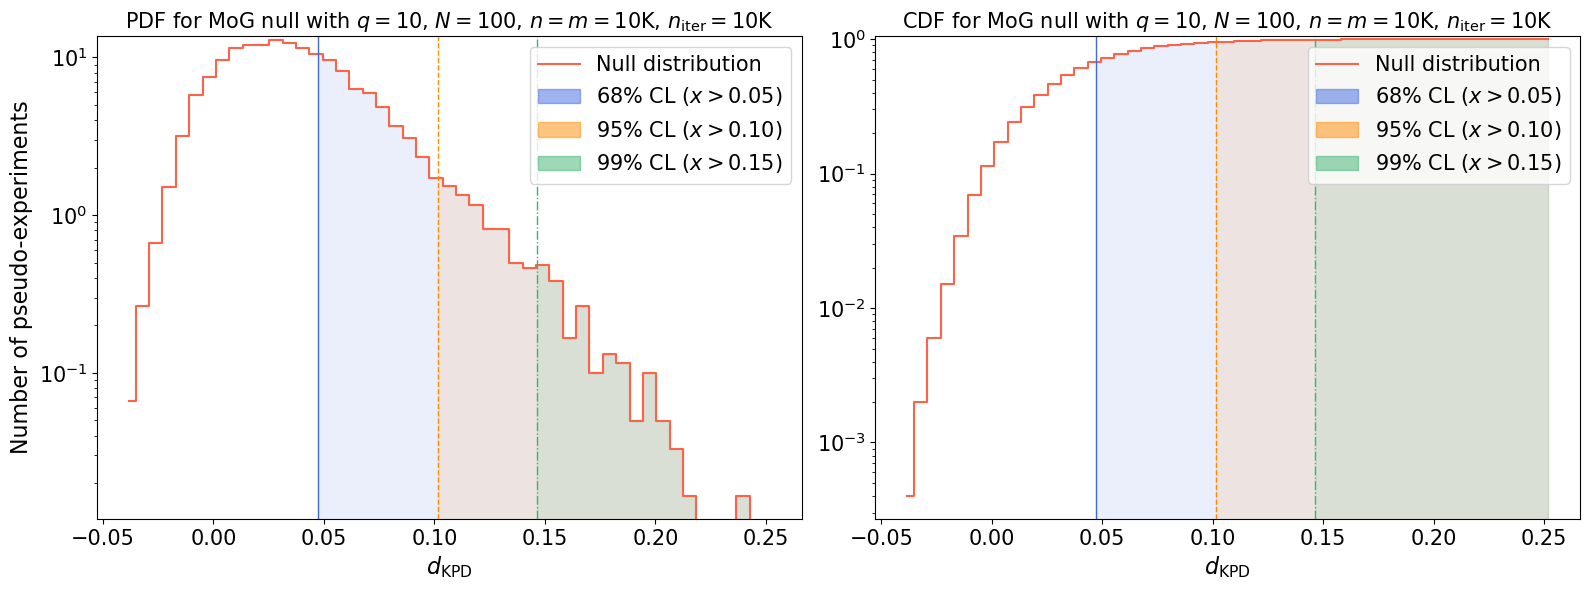

Time elapsed: 1.13491578027606 seconds.
mu = 0.864677958959213 +/- 0.0001505545409078025
sigma = 0.12270066866476421 +/- 0.0009986921392257677


/tmp/ipykernel_52275/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_52275/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_52275/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_52275/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


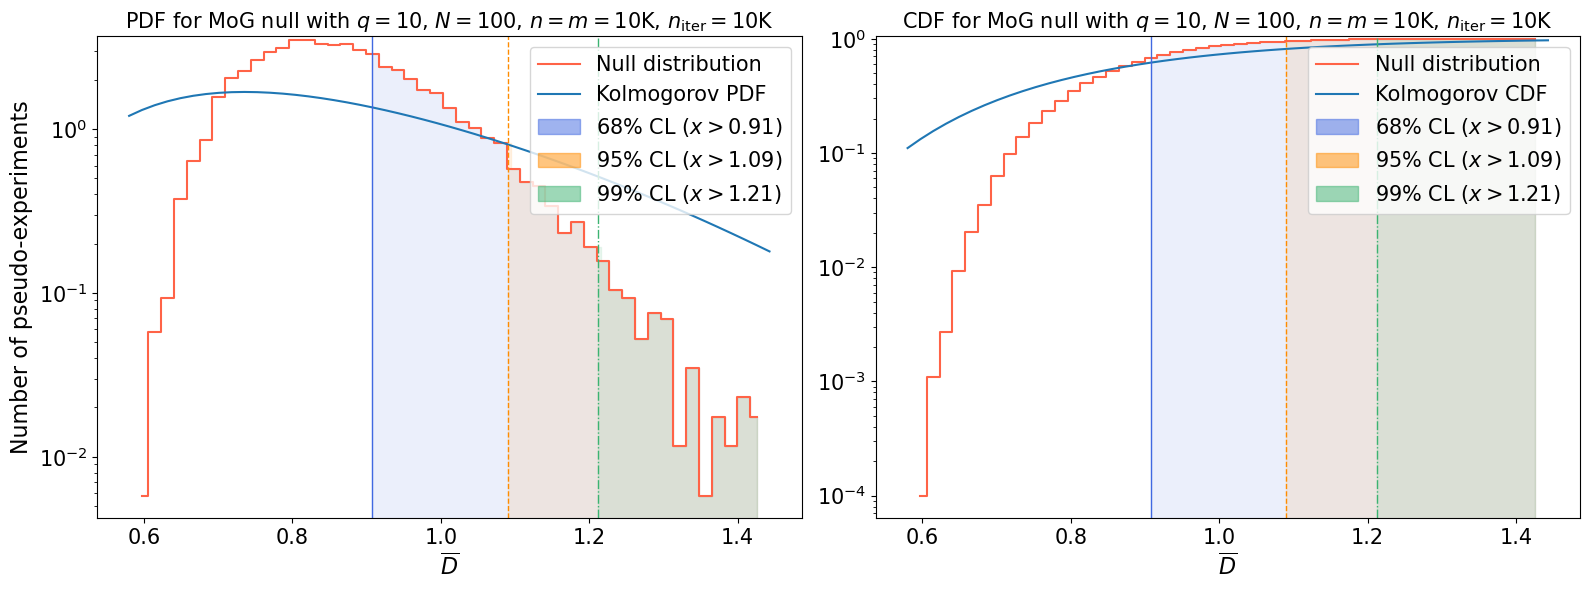

Time elapsed: 1.9771005921065807 seconds.
mu = 0.864318154218513 +/- 0.00012835307403313297
sigma = 0.11329301568637537 +/- 0.0009140666435986401


/tmp/ipykernel_52275/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_52275/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_52275/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_52275/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


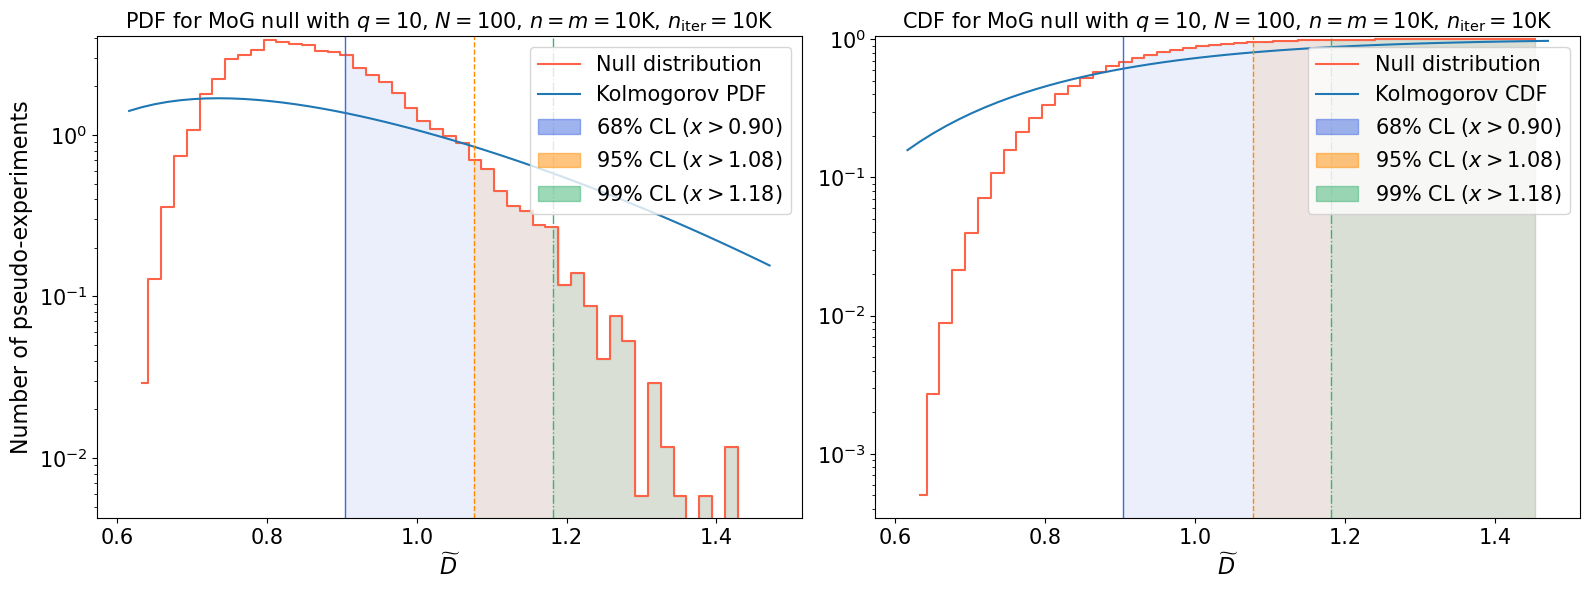

Time elapsed: 1.766838364303112 seconds.
mu = 0.2983922542478831 +/- 3.66893712608093e-05
sigma = 0.06057175188221759 +/- 0.0004637608702027067


/tmp/ipykernel_52275/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_52275/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_52275/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_52275/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


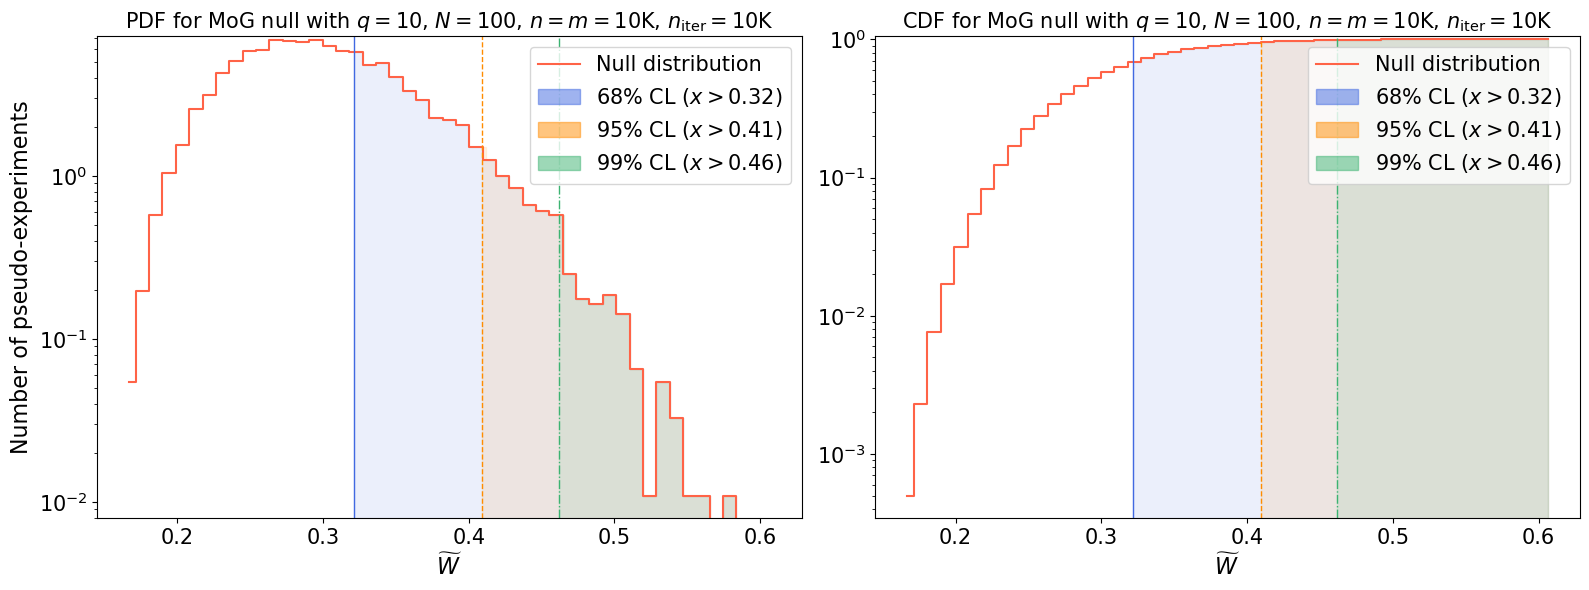

Time elapsed: 1.449169009923935 seconds.


,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds,null_figure
0,fn,FNMetric,GMetrics.FNMetric,{},metric_list,<function <lambda> at 0x7f5c0976f1c0>,"lambda ns, ndims: np.sqrt(ns)/ndims","{'niter': 10000, 'batch_size_test': 10000, 'ba...",200,$\overline{\|\cdot\|}_{F}$,../results/100D_10K/null_hypothesis/FN.json,"[[0.68, [6800, 3199], 0.9190262949972976], [0....",../results/100D_10K/null_hypothesis/FN.pdf
1,fpd,FPDMetric,GMetrics.FPDMetric,{},metric_list,<function <lambda> at 0x7f5c0976f250>,"lambda ns, ndims: (ns/ndims)**(3/2)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",50,$d_{\mathrm{FPD}}$,../results/100D_10K/null_hypothesis/FPD.json,"[[0.68, [6800, 3199], 2.125009796879998], [0.9...",../results/100D_10K/null_hypothesis/FPD.pdf
2,kpd,KPDMetric,GMetrics.KPDMetric,{},metric_list,<function <lambda> at 0x7f5c0976f2e0>,"lambda ns, ndims: ns/np.sqrt(ndims)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",2,$d_{\mathrm{KPD}}$,../results/100D_10K/null_hypothesis/KPD.json,"[[0.68, [6800, 3199], 0.04725440173825035], [0...",../results/100D_10K/null_hypothesis/KPD.pdf
3,ks,KSTest,GMetrics.KSTest,{},statistic_means,<function <lambda> at 0x7f5c0976f370>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",50,$\overline{D}$,../results/100D_10K/null_hypothesis/KS.json,"[[0.68, [6800, 3199], 0.9076427718802609], [0....",../results/100D_10K/null_hypothesis/KS.pdf
4,sks,SKSTest,GMetrics.SKSTest,"{'nslices': 1000, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f5c0976f400>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",50,$\widetilde{D}$,../results/100D_10K/null_hypothesis/SKS.json,"[[0.68, [6800, 3199], 0.903803078077085], [0.9...",../results/100D_10K/null_hypothesis/SKS.pdf
5,swd,SWDMetric,GMetrics.SWDMetric,"{'nslices': 1000, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f5c0976f490>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",50,$\widetilde{W}$,../results/100D_10K/null_hypothesis/SWD.json,"[[0.68, [6800, 3199], 0.3215222675610459], [0....",../results/100D_10K/null_hypothesis/SWD.pdf
6,lr,LRMetric,GMetrics.LRMetric,{'null_test': True},lik_ratio_norm_list,<function <lambda> at 0x7f5c0976f520>,"lambda ns, ndims: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",50,$t_{\mu}$,../results/100D_10K/null_hypothesis/LR.json,[],NaN


In [11]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size

    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[0].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[0].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[1].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[1].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Scan and exclusion limits (bisection method)

In [12]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [13]:
file_path = model_dir + "exclusion_limits.json"
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}

In [14]:
deformations = ["mean", "std", "both"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[:-1]:
    for deformation in deformations:
        result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == metric_config["name"] and v["deformation"] == deformation}.items() if v["exclusion_list"] != []}
        if result == {}:
            print(f"Computing exclusion limits for {metric_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection(metric_config = metric_config,
                                                 test_kwargs = test_kwargs,
                                                 model_dir = model_dir,
                                                 deformation = deformation,
                                                 seed_dist = 0,
                                                 x_tol = 0.01,
                                                 fn_tol = 0.01,
                                                 eps_min = 0.,
                                                 eps_max = 5.,
                                                 max_iterations = 100,
                                                 save = True,
                                                 verbose = True)
        else:
            print(f"Exclusion limits for {metric_config['name']} with {deformation} deformation already loaded.")
        global_results.update(result)
print(global_results.keys())

Exclusion limits for fn with mean deformation already loaded.
Exclusion limits for fn with std deformation already loaded.
Exclusion limits for fn with both deformation already loaded.
Exclusion limits for fpd with mean deformation already loaded.
Exclusion limits for fpd with std deformation already loaded.
Exclusion limits for fpd with both deformation already loaded.
Exclusion limits for kpd with mean deformation already loaded.
Exclusion limits for kpd with std deformation already loaded.
Exclusion limits for kpd with both deformation already loaded.
Exclusion limits for ks with mean deformation already loaded.
Exclusion limits for ks with std deformation already loaded.
Exclusion limits for ks with both deformation already loaded.
Exclusion limits for sks with mean deformation already loaded.
Exclusion limits for sks with std deformation already loaded.
Exclusion limits for sks with both deformation already loaded.
Exclusion limits for swd with mean deformation already loaded.
Exc

### Likelihood-ratio test

In [15]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10_000,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": True}

In [16]:
deformations = ["mean", "std", "both"]

for deformation in deformations:
    result = {k: v for k, v in existing_data.items() if v["null_config"]["name"] == "lr" and v["deformation"] == deformation}
    if result == {}:
        print(f"Computing exclusion limits for lr with {deformation} deformation.")
        result = compute_exclusion_LR_bisection(metric_config = metrics_config[unique_key]["lr"],
                                                test_kwargs = test_kwargs,
                                                model_dir = model_dir,
                                                cl_list = [0.95, 0.99],
                                                deformation = deformation,
                                                seed_dist = 0,
                                                x_tol = 0.01,
                                                fn_tol = 0.01,
                                                eps_min = 0.,
                                                eps_max = 0.005,
                                                max_iterations = 100,
                                                save = True,
                                                verbose = True)
    else:
        print(f"Exclusion limits for LR with {deformation} deformation already loaded.")
    global_results.update(result)
print(global_results.keys())

Exclusion limits for LR with mean deformation already loaded.
Exclusion limits for LR with std deformation already loaded.
Exclusion limits for LR with both deformation already loaded.
dict_keys(['2024-04-01T08:24:49.124864', '2024-04-01T08:28:54.337398', '2024-04-01T08:31:33.449356', '2024-04-01T08:35:49.020289', '2024-04-01T08:44:48.591876', '2024-04-01T08:52:16.879900', '2024-04-02T20:18:35.637194', '2024-04-02T20:30:28.739121', '2024-04-02T20:38:28.448578', '2024-04-02T20:50:29.844374', '2024-04-02T21:08:05.003512', '2024-04-02T21:24:39.792789', '2024-04-02T21:44:06.922813', '2024-04-02T21:56:59.147386', '2024-04-02T22:07:45.598323', '2024-04-02T22:22:30.968427', '2024-04-02T22:32:17.290445', '2024-04-02T22:39:38.684468', '2024-04-03T06:47:02.687238', '2024-04-03T07:59:33.692468', '2024-04-03T09:08:33.293265'])


### Show and save results

In [17]:
global_results_list = [x for x in global_results.values()]
results = []
for global_result in global_results_list:
    name = global_result["null_config"]["name"]
    print(f"Metric: {name}")
    deformation = global_result["deformation"]
    ndims = global_result["null_config"]["test_config"]["ndims"]
    niter = global_result["null_config"]["test_config"]["niter"]
    nsamples = global_result["null_config"]["test_config"]["batch_size_test"]
    try:
        exclusion_95 = eval(format(global_result["exclusion_list"][0][2], ".5f"))
    except:
        exclusion_95 = "N/A"
    try:
        exclusion_99 = eval(format(global_result["exclusion_list"][1][2], ".5f"))
    except:
        exclusion_99 = "N/A"
    time_elapsed = global_result["time_elapsed"]
    #print(exclusion_95)
    #print(round_to_n_significant_digits(exclusion_95, 3))
    results.append([name, deformation, ndims, niter, nsamples, exclusion_95, exclusion_99, int(time_elapsed)])
    #results.append([name, deformation, ndims, niter, nsamples, round_to_n_significant_digits(exclusion_95, 3), round_to_n_significant_digits(exclusion_99, 3), int(time_elapsed)])
results_df = pd.DataFrame(results, columns=["Statistic", "Deformation", "$N$", "$n=m$", "$n_{\\mathrm{iter}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$", "t (s)"])
times_df = pd.DataFrame(null_times+[["lr", "-"]], columns=["Statistic", "$t^{\\mathrm{null}}$ (s)"])

Metric: fn
Metric: fn
Metric: fn
Metric: fpd
Metric: fpd
Metric: fpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: ks
Metric: ks
Metric: ks
Metric: sks
Metric: sks
Metric: sks
Metric: swd
Metric: swd
Metric: swd
Metric: lr
Metric: lr
Metric: lr


In [18]:
results_df_mean = results_df[results_df["Deformation"] == "mean"]
results_df_std = results_df[results_df["Deformation"] == "std"]
results_df_both = results_df[results_df["Deformation"] == "both"]

In [19]:
sorted_df_mean = results_df_mean.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu}$ (s)"}, inplace=True)
display(sorted_df_mean)
sorted_df_mean.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s)
18,lr,mean,100,10000,10000,0.00001,0.00001,4350
9,ks,mean,100,10000,10000,0.00410,0.00728,1055
12,sks,mean,100,10000,10000,0.06134,0.08154,772
15,swd,mean,100,10000,10000,0.08698,0.11906,586
3,fpd,mean,100,10000,10000,0.09351,0.12670,539
0,fn,mean,100,10000,10000,0.09448,0.12676,245
6,kpd,mean,100,10000,10000,0.18494,0.23784,713


,Statistic,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s)
18,lr,0.00001,0.00001,4350
9,ks,0.00410,0.00728,1055
12,sks,0.06134,0.08154,772
15,swd,0.08698,0.11906,586
3,fpd,0.09351,0.12670,539
0,fn,0.09448,0.12676,245
6,kpd,0.18494,0.23784,713


In [20]:
sorted_df_std = results_df_std.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_std.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\sigma}$ (s)"}, inplace=True)
display(sorted_df_std)
sorted_df_std.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_std)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\sigma}_{99\%\mathrm{CL}}$,$t^{\sigma}$ (s)
19,lr,std,100,10000,10000,0.00001,0.00002,4139
10,ks,std,100,10000,10000,0.00950,0.02237,994
4,fpd,std,100,10000,10000,0.32910,0.43000,448
13,sks,std,100,10000,10000,0.44556,0.54563,646
16,swd,std,100,10000,10000,0.52979,0.63237,441
1,fn,std,100,10000,10000,0.75586,0.88937,159
7,kpd,std,100,10000,10000,3.44727,3.97495,479


,Statistic,$\epsilon^{\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\sigma}_{99\%\mathrm{CL}}$,$t^{\sigma}$ (s)
19,lr,0.00001,0.00002,4139
10,ks,0.00950,0.02237,994
4,fpd,0.32910,0.43000,448
13,sks,0.44556,0.54563,646
16,swd,0.52979,0.63237,441
1,fn,0.75586,0.88937,159
7,kpd,3.44727,3.97495,479


In [21]:
sorted_df_both = results_df_both.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_both.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\\sigma}$ (s)"}, inplace=True)
display(sorted_df_both)
sorted_df_both.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_both)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$,$t^{\mu-\sigma}$ (s)
20,lr,both,100,10000,10000,0.00000,0.00001,4479
11,ks,both,100,10000,10000,0.00344,0.00575,1167
14,sks,both,100,10000,10000,0.06027,0.08047,885
17,swd,both,100,10000,10000,0.08575,0.11785,597
5,fpd,both,100,10000,10000,0.09009,0.12163,549
2,fn,both,100,10000,10000,0.09399,0.12629,255
8,kpd,both,100,10000,10000,0.18372,0.23663,721


,Statistic,$\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$,$t^{\mu-\sigma}$ (s)
20,lr,0.00000,0.00001,4479
11,ks,0.00344,0.00575,1167
14,sks,0.06027,0.08047,885
17,swd,0.08575,0.11785,597
5,fpd,0.09009,0.12163,549
2,fn,0.09399,0.12629,255
8,kpd,0.18372,0.23663,721


In [23]:
result_table = sorted_df_mean.merge(sorted_df_std, on='Statistic', how='outer').merge(sorted_df_both, on='Statistic', how='outer').merge(times_df, on='Statistic', how='outer')
result_table = result_table.replace("lr","$t_{\\mathrm{LLR}}$").replace("ks","$\\overline{D}$").replace("sks","$\\widetilde{D}$").replace("swd","$\\widetilde{W}$").replace("fpd","$d_{\\mathrm{FPD}}$").replace("fn","$\\overline{\\|\cdot\\|}_{F}$").replace("kpd","$d_{\\mathrm{KPD}}$")
display(result_table)
print(result_table.to_latex(index=False, column_format='l|llr|llr|llr|r', longtable=False, float_format="%.2g"))

,Statistic,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s),$\epsilon^{\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\sigma}_{99\%\mathrm{CL}}$,$t^{\sigma}$ (s),$\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$,$t^{\mu-\sigma}$ (s),$t^{\mathrm{null}}$ (s)
0,$t_{\mathrm{LLR}}$,0.00001,0.00001,4350,0.00001,0.00002,4139,0.00000,0.00001,4479,-
1,$\overline{D}$,0.00410,0.00728,1055,0.00950,0.02237,994,0.00344,0.00575,1167,13499
2,$\widetilde{D}$,0.06134,0.08154,772,0.44556,0.54563,646,0.06027,0.08047,885,11106
3,$\widetilde{W}$,0.08698,0.11906,586,0.52979,0.63237,441,0.08575,0.11785,597,7248
4,$d_{\mathrm{FPD}}$,0.09351,0.12670,539,0.32910,0.43000,448,0.09009,0.12163,549,11317
5,$\overline{\|\cdot\|}_{F}$,0.09448,0.12676,245,0.75586,0.88937,159,0.09399,0.12629,255,86
6,$d_{\mathrm{KPD}}$,0.18494,0.23784,713,3.44727,3.97495,479,0.18372,0.23663,721,11293


\begin{tabular}{l|llr|llr|llr|r}
\toprule
Statistic & $\epsilon^{\mu}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu}_{99\%\mathrm{CL}}$ & $t^{\mu}$ (s) & $\epsilon^{\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\sigma}_{99\%\mathrm{CL}}$ & $t^{\sigma}$ (s) & $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$ & $t^{\mu-\sigma}$ (s) & $t^{\mathrm{null}}$ (s) \\
\midrule
$t_{\mathrm{LLR}}$ & 1e-05 & 1e-05 & 4350 & 1e-05 & 2e-05 & 4139 & 0 & 1e-05 & 4479 & - \\
$\overline{D}$ & 0.0041 & 0.0073 & 1055 & 0.0095 & 0.022 & 994 & 0.0034 & 0.0057 & 1167 & 13499 \\
$\widetilde{D}$ & 0.061 & 0.082 & 772 & 0.45 & 0.55 & 646 & 0.06 & 0.08 & 885 & 11106 \\
$\widetilde{W}$ & 0.087 & 0.12 & 586 & 0.53 & 0.63 & 441 & 0.086 & 0.12 & 597 & 7248 \\
$d_{\mathrm{FPD}}$ & 0.094 & 0.13 & 539 & 0.33 & 0.43 & 448 & 0.09 & 0.12 & 549 & 11317 \\
$\overline{\|\cdot\|}_{F}$ & 0.094 & 0.13 & 245 & 0.76 & 0.89 & 159 & 0.094 & 0.13 & 255 & 86 \\
$d_{\mathrm{KPD}}$ & 0.18 & 0.24 & 713 & 3.4 & 4 & 479 

# Fixed $n=100000$

## Null hypotheses

### Model definition

In [2]:
seed = 0
ncomp = 10
ndims = 100
niter = 10_000
batch_size_test = 100_000
eps_loc = 0.
eps_scale = 0.
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mixture.Mixture'> <class 'tensorflow_probability.python.distributions.mixture.Mixture'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (100,) (100,)


In [3]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
null_hypotheses_dir = model_dir + "null_hypothesis/"
metrics_config_file = model_dir + "metrics_config.json"

In [4]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 1_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 1000000000
batch_size 100000
niter 10000
niter * batch_size 1000000000
small_sample False


In [7]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.
To run under the alternative hypothesis, set the `null_test` attribute to False.


### Set up tests and metrics configurations

In [8]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value
    
test_config_null["ncomp"] = ncomp

pd.DataFrame([test_config_null])

,niter,batch_size_test,batch_size_gen,small_sample_threshold,dtype_input,seed,use_tf,mirror_strategy,strategy,verbose,is_symb_1,ndims_1,nsamples_1,is_symb_2,ndims_2,nsamples_2,dtype,ndims,nsamples,small_sample
0,10000,100000,1000,10000000,float64,0,True,False,None,True,True,100,0,True,100,0,float64,100,1000000000,False


In [9]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncop_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"fn": {"name": "fn", # type: ignore
                                       "object_name": "FNMetric",
                                       "class_name": "GMetrics.FNMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns)/ndims,
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)/ndims",
                                       "test_config": test_config_null,
                                       "max_vectorize": 20,
                                       "latex": "$\overline{\|\cdot\|}_{F}$",
                                       "null_file": null_hypotheses_dir+"FN.json"},
                               "fpd": {"name": "fpd",
                                       "object_name": "FPDMetric",
                                       "class_name": "GMetrics.FPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: (ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: (ns/ndims)**(3/2)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 20,
                                       "latex": "$d_{\mathrm{FPD}}$",
                                       "null_file": null_hypotheses_dir+"FPD.json"},
                               "kpd": {"name": "kpd",
                                       "object_name": "KPDMetric" ,
                                       "class_name": "GMetrics.KPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: ns/np.sqrt(ndims),
                                       "scale_func_string": "lambda ns, ndims: ns/np.sqrt(ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 2,
                                       "latex": "$d_{\mathrm{KPD}}$",
                                       "null_file": null_hypotheses_dir+"KPD.json"},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTest",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 2000,
                                       "latex": "$\overline{D}$",
                                       "null_file": null_hypotheses_dir+"KS.json"},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTest",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 20,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": null_hypotheses_dir+"SKS.json"},
                               "swd": {"name": "swd",
                                       "object_name": "SWDMetric",
                                       "class_name": "GMetrics.SWDMetric", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 10,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": null_hypotheses_dir+"SWD.json"},
                               "lr": {"name": "lr",
                                       "object_name": "LRMetric",
                                       "class_name": "GMetrics.LRMetric", 
                                       "kwargs": {"null_test": True},
                                       "result_key": "lik_ratio_norm_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 20,
                                       "latex": "$t_{\mu}$",
                                       "null_file": null_hypotheses_dir+"LR.json"}}}
metrics_config[unique_key]

{'fn': {'name': 'fn',
  'object_name': 'FNMetric',
  'class_name': 'GMetrics.FNMetric',
  'kwargs': {},
  'result_key': 'metric_list',
  'scale_func': <function __main__.<lambda>(ns, ndims)>,
  'scale_func_string': 'lambda ns, ndims: np.sqrt(ns)/ndims',
  'test_config': {'niter': 10000,
   'batch_size_test': 100000,
   'batch_size_gen': 1000,
   'small_sample_threshold': 10000000,
   'dtype_input': 'float64',
   'seed': 0,
   'use_tf': True,
   'mirror_strategy': False,
   'strategy': None,
   'verbose': True,
   'is_symb_1': True,
   'ndims_1': 100,
   'nsamples_1': 0,
   'is_symb_2': True,
   'ndims_2': 100,
   'nsamples_2': 0,
   'dtype': 'float64',
   'ndims': 100,
   'nsamples': 1000000000,
   'small_sample': False},
  'max_vectorize': 20,
  'latex': '$\\overline{\\|\\cdot\\|}_{F}$',
  'null_file': '../results/100D_100K/null_hypothesis/FN.json'},
 'fpd': {'name': 'fpd',
  'object_name': 'FPDMetric',
  'class_name': 'GMetrics.FPDMetric',
  'kwargs': {},
  'result_key': 'metric_list

### Evaluate null hypotheses

In [10]:
for metric in list(metrics_config[unique_key].values())[0:-1]:
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and saving {name} with max_vectorize = {max_vectorize}")
        obj.Test_tf(max_vectorize=max_vectorize)
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Loading fn from ../results/100D_100K/null_hypothesis/FN.json
Loading fpd from ../results/100D_100K/null_hypothesis/FPD.json
Loading kpd from ../results/100D_100K/null_hypothesis/KPD.json
Loading ks from ../results/100D_100K/null_hypothesis/KS.json
Loading sks from ../results/100D_100K/null_hypothesis/SKS.json
Loading swd from ../results/100D_100K/null_hypothesis/SWD.json


In [11]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[-1].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
metrics_config[unique_key]["lr"]["thresholds"] = []

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fn: [[0.68, [6800, 3199], 0.9258989284309033], [0.95, [9500, 500], 1.1755846953979594], [0.99, [9900, 100], 1.3288920439846852]]
Computing time for metric fn: 1192.3916471060365
ThresholdS for metric fpd: [[0.68, [6800, 3199], 8.221457181835765], [0.95, [9500, 500], 11.42397609382258], [0.99, [9900, 100], 13.729975687111372]]
Computing time for metric fpd: 12183.665291106328
ThresholdS for metric kpd: [[0.68, [6800, 3199], 0.026853186154696118], [0.95, [9500, 500], 0.25166410386745497], [0.99, [9900, 100], 0.41025061594979206]]
Computing time for metric kpd: 12252.158641371876
ThresholdS for metric ks: [[0.68, [6800, 3199], 0.9141729251025132], [0.95, [9500, 500], 1.0960093292742217], [0.99, [9900, 100], 1.2174511839365685]]
Computing time for metric ks: 2693.7960739396513
ThresholdS for metric sks: [[0.68, [6800, 3199], 0.9128308117849685], [0.95, [9500, 500], 1.0826608170592023], [0.99, [9900, 100], 1.1999201775449875]]
Computing time for metric sks: 3733.704111

,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds
0,fn,FNMetric,GMetrics.FNMetric,{},metric_list,<function <lambda> at 0x7f1c001f1b40>,"lambda ns, ndims: np.sqrt(ns)/ndims","{'niter': 10000, 'batch_size_test': 100000, 'b...",20,$\overline{\|\cdot\|}_{F}$,../results/100D_100K/null_hypothesis/FN.json,"[[0.68, [6800, 3199], 0.9258989284309033], [0...."
1,fpd,FPDMetric,GMetrics.FPDMetric,{},metric_list,<function <lambda> at 0x7f1c001f3640>,"lambda ns, ndims: (ns/ndims)**(3/2)","{'niter': 10000, 'batch_size_test': 100000, 'b...",20,$d_{\mathrm{FPD}}$,../results/100D_100K/null_hypothesis/FPD.json,"[[0.68, [6800, 3199], 8.221457181835765], [0.9..."
2,kpd,KPDMetric,GMetrics.KPDMetric,{},metric_list,<function <lambda> at 0x7f1c001f36d0>,"lambda ns, ndims: ns/np.sqrt(ndims)","{'niter': 10000, 'batch_size_test': 100000, 'b...",2,$d_{\mathrm{KPD}}$,../results/100D_100K/null_hypothesis/KPD.json,"[[0.68, [6800, 3199], 0.026853186154696118], [..."
3,ks,KSTest,GMetrics.KSTest,{},statistic_means,<function <lambda> at 0x7f1c001f3760>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",2000,$\overline{D}$,../results/100D_100K/null_hypothesis/KS.json,"[[0.68, [6800, 3199], 0.9141729251025132], [0...."
4,sks,SKSTest,GMetrics.SKSTest,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f1c001f37f0>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",20,$\widetilde{D}$,../results/100D_100K/null_hypothesis/SKS.json,"[[0.68, [6800, 3199], 0.9128308117849685], [0...."
5,swd,SWDMetric,GMetrics.SWDMetric,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f1c001f3880>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 10000, 'batch_size_test': 100000, 'b...",10,$\widetilde{W}$,../results/100D_100K/null_hypothesis/SWD.json,"[[0.68, [6800, 3199], 0.334238442236101], [0.9..."
6,lr,LRMetric,GMetrics.LRMetric,{'null_test': True},lik_ratio_norm_list,<function <lambda> at 0x7f1c001f3910>,"lambda ns, ndims: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",20,$t_{\mu}$,../results/100D_100K/null_hypothesis/LR.json,[]


### Plots of null-distributions

mu = 0.8487354811396679 +/- 0.00033789064671807615
sigma = 0.18381802053065313 +/- 0.0013811382888967638


/tmp/ipykernel_4014/3478490683.py:75: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_4014/3478490683.py:77: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_4014/3478490683.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_4014/3478490683.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


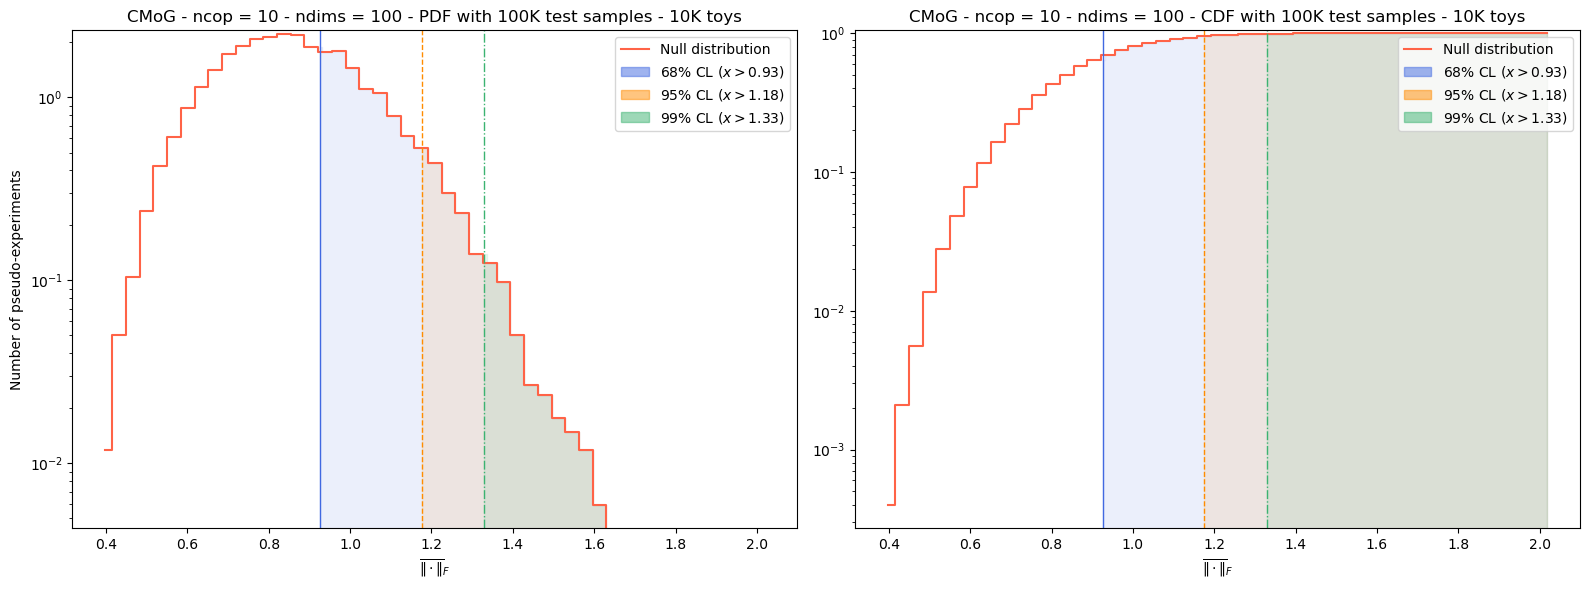

Time elapsed: 1.094465471804142 seconds.
mu = 7.069964198067763 +/- 0.07735860399056298
sigma = 2.7813414747305476 +/- 0.02373925005512347


/tmp/ipykernel_4014/3478490683.py:75: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_4014/3478490683.py:77: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_4014/3478490683.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_4014/3478490683.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


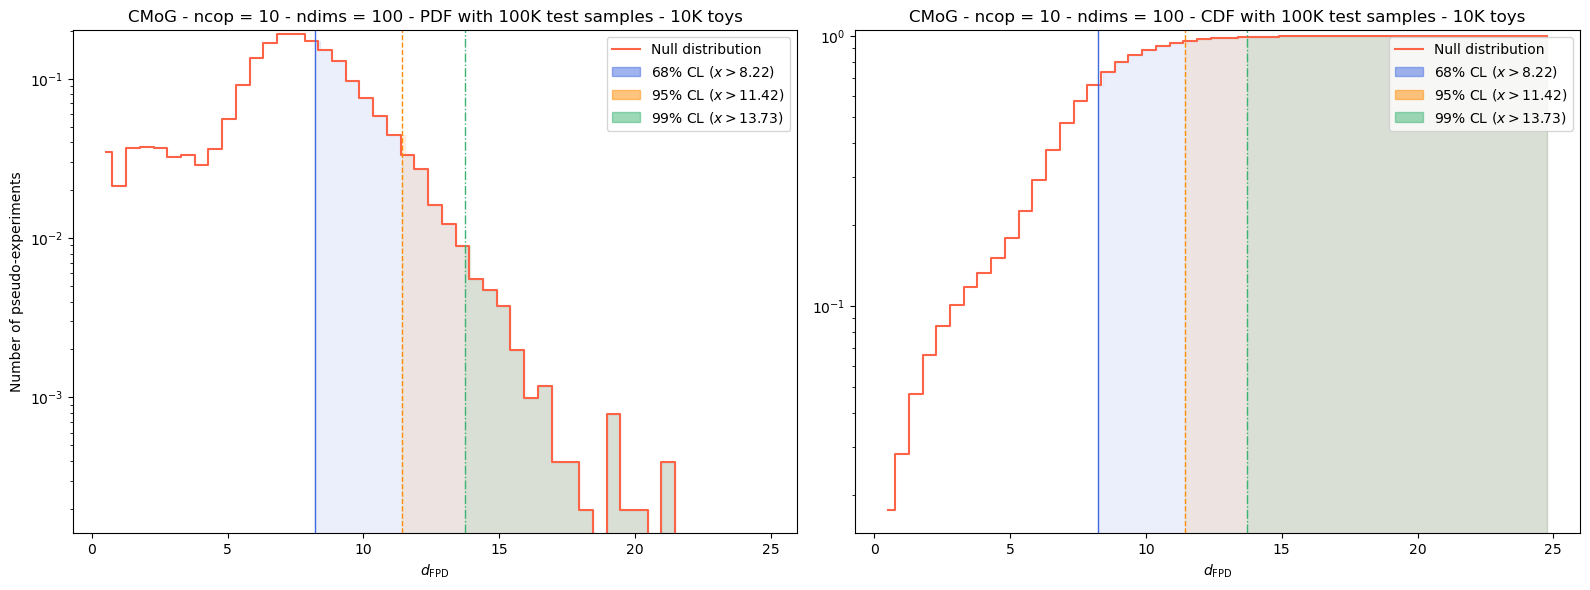

Time elapsed: 0.8014550730586052 seconds.
mu = -0.03880754202424198 +/- 0.00027282015121302095
sigma = 0.1651726827332598 +/- 0.0013365369344893643


/tmp/ipykernel_4014/3478490683.py:75: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_4014/3478490683.py:77: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_4014/3478490683.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_4014/3478490683.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


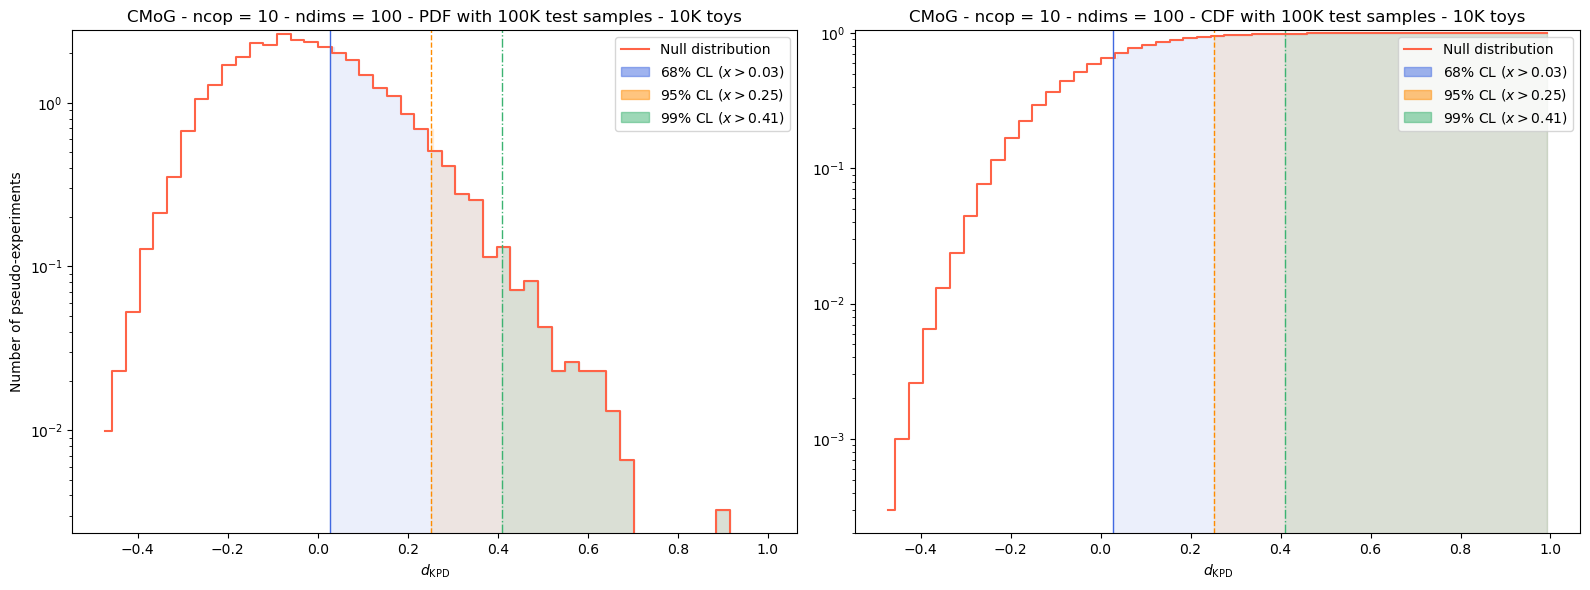

Time elapsed: 0.8993796203285456 seconds.
mu = 0.8695765694473794 +/- 0.0001516315439172587
sigma = 0.12313876072027796 +/- 0.001003058525001457


/tmp/ipykernel_4014/3478490683.py:75: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_4014/3478490683.py:77: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_4014/3478490683.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_4014/3478490683.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


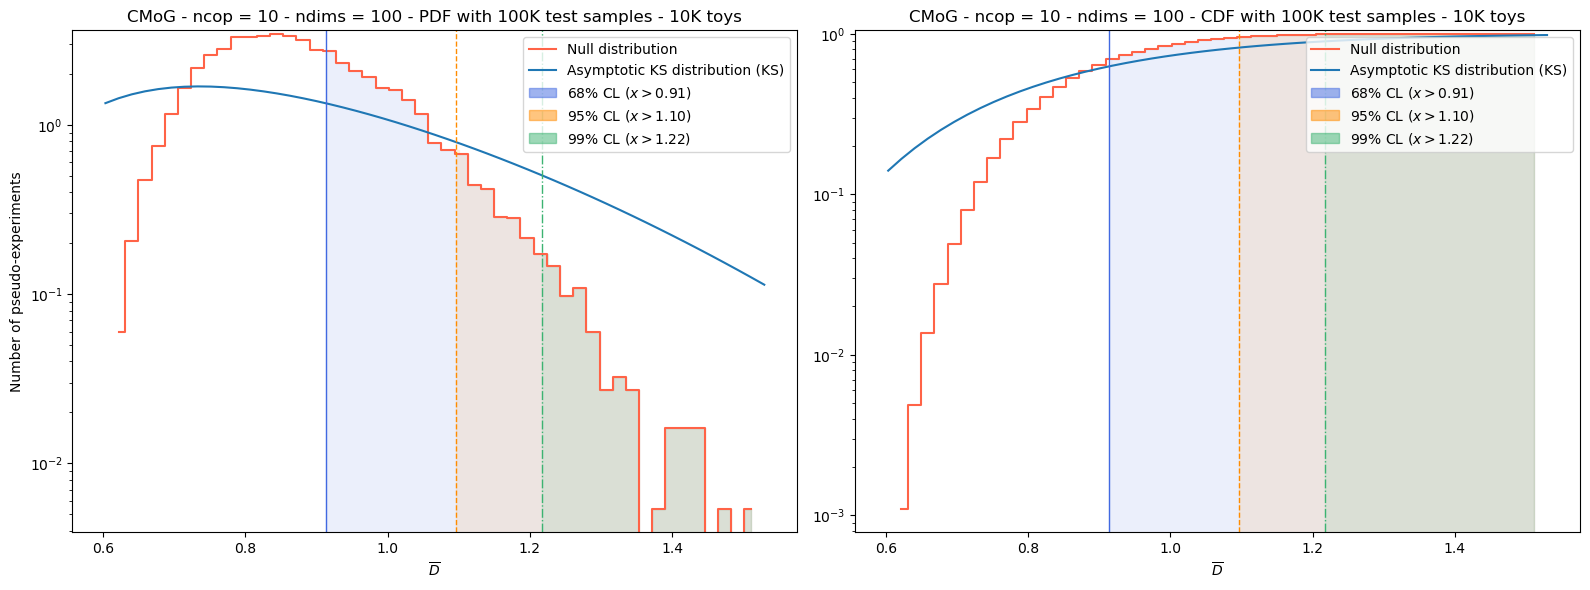

Time elapsed: 1.8452329728752375 seconds.
mu = 0.8694493949517444 +/- 0.0001355086357521678
sigma = 0.11640817658230361 +/- 0.0009378680481043849


/tmp/ipykernel_4014/3478490683.py:75: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_4014/3478490683.py:77: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_4014/3478490683.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_4014/3478490683.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


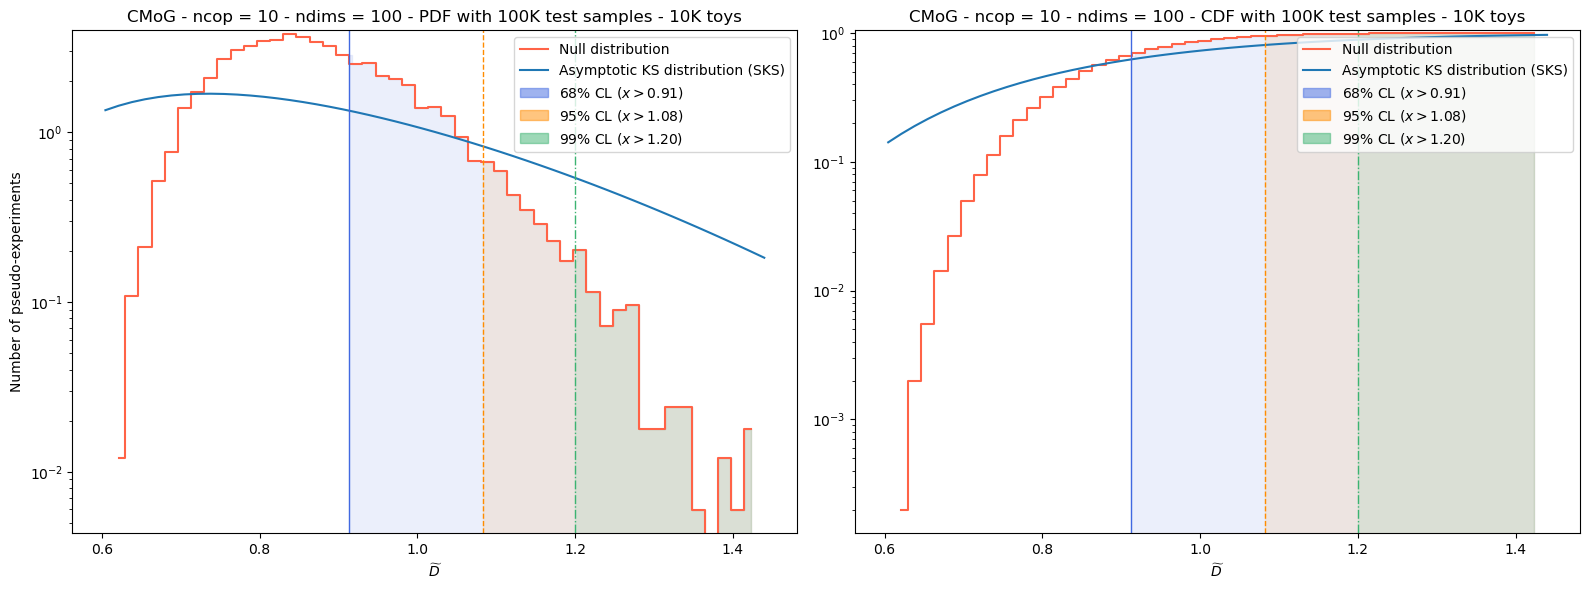

Time elapsed: 1.417887233197689 seconds.
mu = 0.3094153676259014 +/- 4.1475367329474304e-05
sigma = 0.0644013721355953 +/- 0.0004879690422926139


/tmp/ipykernel_4014/3478490683.py:75: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_4014/3478490683.py:77: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_4014/3478490683.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_4014/3478490683.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


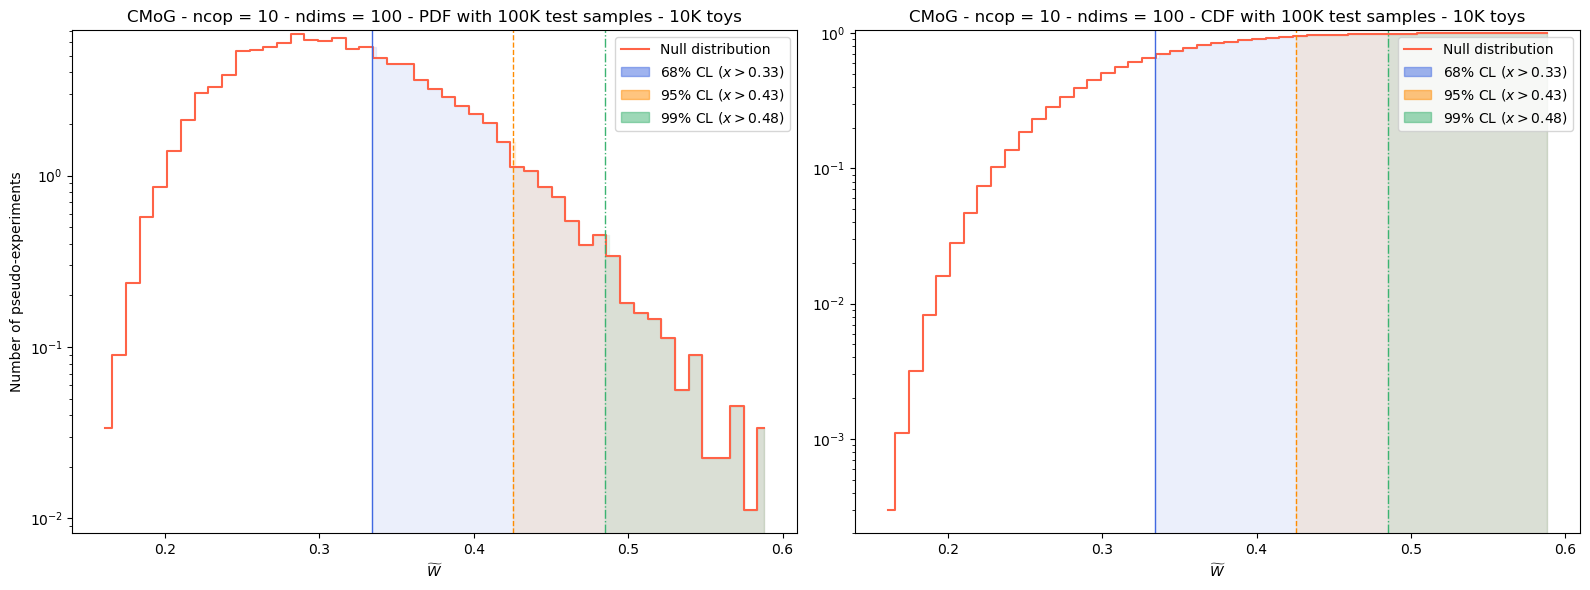

Time elapsed: 1.1931215953081846 seconds.


,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds,null_figure
0,fn,FNMetric,GMetrics.FNMetric,{},metric_list,<function <lambda> at 0x7fdf9764ef80>,"lambda ns, ndims: np.sqrt(ns)/ndims","{'niter': 10000, 'batch_size_test': 100000, 'b...",20,$\overline{\|\cdot\|}_{F}$,../results/100D_100K/null_hypothesis/FN.json,"[[0.68, [6800, 3199], 0.9258989284309033], [0....",../results/100D_100K/null_hypothesis/FN.pdf
1,fpd,FPDMetric,GMetrics.FPDMetric,{},metric_list,<function <lambda> at 0x7fdf9764f010>,"lambda ns, ndims: (ns/ndims)**(3/2)","{'niter': 10000, 'batch_size_test': 100000, 'b...",20,$d_{\mathrm{FPD}}$,../results/100D_100K/null_hypothesis/FPD.json,"[[0.68, [6800, 3199], 8.221457181835765], [0.9...",../results/100D_100K/null_hypothesis/FPD.pdf
2,kpd,KPDMetric,GMetrics.KPDMetric,{},metric_list,<function <lambda> at 0x7fdf9764f0a0>,"lambda ns, ndims: ns/np.sqrt(ndims)","{'niter': 10000, 'batch_size_test': 100000, 'b...",2,$d_{\mathrm{KPD}}$,../results/100D_100K/null_hypothesis/KPD.json,"[[0.68, [6800, 3199], 0.026853186154696118], [...",../results/100D_100K/null_hypothesis/KPD.pdf
3,ks,KSTest,GMetrics.KSTest,{},statistic_means,<function <lambda> at 0x7fdf9764f130>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",2000,$\overline{D}$,../results/100D_100K/null_hypothesis/KS.json,"[[0.68, [6800, 3199], 0.9141729251025132], [0....",../results/100D_100K/null_hypothesis/KS.pdf
4,sks,SKSTest,GMetrics.SKSTest,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7fdf9764f1c0>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",20,$\widetilde{D}$,../results/100D_100K/null_hypothesis/SKS.json,"[[0.68, [6800, 3199], 0.9128308117849685], [0....",../results/100D_100K/null_hypothesis/SKS.pdf
5,swd,SWDMetric,GMetrics.SWDMetric,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7fdf9764f250>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 10000, 'batch_size_test': 100000, 'b...",20,$\widetilde{W}$,../results/100D_100K/null_hypothesis/SWD.json,"[[0.68, [6800, 3199], 0.334238442236101], [0.9...",../results/100D_100K/null_hypothesis/SWD.pdf
6,lr,LRMetric,GMetrics.LRMetric,{'null_test': True},lik_ratio_norm_list,<function <lambda> at 0x7fdf9764f2e0>,"lambda ns, ndims: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",20,$t_{\mu}$,../results/100D_100K/null_hypothesis/LR.json,[],NaN


In [13]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size

    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[0].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[0].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[1].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[1].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Scan and exclusion limits (bisection method)

In [13]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [ ]:
file_path = model_dir + "exclusion_limits.json"
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}

In [14]:
deformations = ["mean", "std", "both"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[:-1]:
    for deformation in deformations:
        result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == metric_config["name"] and v["deformation"] == deformation}.items() if v["exclusion_list"] != []}
        if result == {}:
            print(f"Computing exclusion limits for {metric_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection(metric_config = metric_config,
                                                 test_kwargs = test_kwargs,
                                                 model_dir = model_dir,
                                                 deformation = deformation,
                                                 seed_dist = 0,
                                                 x_tol = 0.01,
                                                 fn_tol = 0.01,
                                                 eps_min = 0.,
                                                 eps_max = 1.,
                                                 max_iterations = 100,
                                                 save = True,
                                                 verbose = True)
        else:
            print(f"Exclusion limits for {metric_config['name']} with {deformation} deformation already loaded.")
        global_results.update(result)
print(global_results.keys())


=============== swd - only mean ===============

------------ 1 ------------
eps = 0.5


statistic = 3.693764918856717 - next threshold = 0.4252115016438996 at 0.95 CL

------------ 2 ------------
eps = 0.25
statistic = 1.9006757791619386 - next threshold = 0.4252115016438996 at 0.95 CL

------------ 3 ------------
eps = 0.125
statistic = 1.0248787531003012 - next threshold = 0.4252115016438996 at 0.95 CL

------------ 4 ------------
eps = 0.0625
statistic = 0.6146349421044832 - next threshold = 0.4252115016438996 at 0.95 CL

------------ 5 ------------
eps = 0.03125
statistic = 0.43975614487994724 - next threshold = 0.4252115016438996 at 0.95 CL

------------ 6 ------------
eps = 0.015625
statistic = 0.37557472516034907 - next threshold = 0.4252115016438996 at 0.95 CL

------------ 7 ------------
eps = 0.0234375
statistic = 0.4046105969321284 - next threshold = 0.4252115016438996 at 0.95 CL

------------ 8 ------------
eps = 0.02734375
statistic = 0.4215521398897323 - next threshold = 0.4252115016438996 at 0.95 CL

------------ 9 ------------
eps = 0.029296875
statistic =

### Likelihood-ratio test

In [25]:
deformations = ["mean", "std", "both"]

for deformation in deformations:
    result = {k: v for k, v in existing_data.items() if v["null_config"]["name"] == "lr" and v["deformation"] == deformation}
    if result == {}:
        print(f"Computing exclusion limits for lr with {deformation} deformation.")
        result = compute_exclusion_LR_bisection(metric_config = metrics_config[unique_key]["lr"],
                                                test_kwargs = test_kwargs,
                                                model_dir = model_dir,
                                                cl_list = [0.95, 0.99],
                                                deformation = deformation,
                                                seed_dist = 0,
                                                x_tol = 0.01,
                                                fn_tol = 0.01,
                                                eps_min = 0.,
                                                eps_max = 0.01,
                                                max_iterations = 100,
                                                save = True,
                                                verbose = True)
    else:
        print(f"Exclusion limits for LR with {deformation} deformation already loaded.")
    global_results.update(result)
print(global_results.keys())


=============== lr - only mean ===============

------------ 1 ------------
eps = 0.0005
Computing null distribution


To run under the alternative hypothesis, set the `null_test` attribute to False.



KeyboardInterrupt



### Show and save results

In [18]:
global_results_list = [x for x in global_results.values()]
results = []
for global_result in global_results_list:
    name = global_result["null_config"]["name"]
    print(f"Metric: {name}")
    deformation = global_result["deformation"]
    ndims = global_result["null_config"]["test_config"]["ndims"]
    niter = global_result["null_config"]["test_config"]["niter"]
    nsamples = global_result["null_config"]["test_config"]["batch_size_test"]
    try:
        exclusion_95 = eval(format(global_result["exclusion_list"][0][2], ".5f"))
    except:
        exclusion_95 = "N/A"
    try:
        exclusion_99 = eval(format(global_result["exclusion_list"][1][2], ".5f"))
    except:
        exclusion_99 = "N/A"
    time_elapsed = global_result["time_elapsed"]
    #print(exclusion_95)
    #print(round_to_n_significant_digits(exclusion_95, 3))
    results.append([name, deformation, ndims, niter, nsamples, exclusion_95, exclusion_99, int(time_elapsed)])
    #results.append([name, deformation, ndims, niter, nsamples, round_to_n_significant_digits(exclusion_95, 3), round_to_n_significant_digits(exclusion_99, 3), int(time_elapsed)])
results_df = pd.DataFrame(results, columns=["Statistic", "Deformation", "$N$", "$n=m$", "$n_{\\mathrm{iter}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$", "t (s)"])
times_df = pd.DataFrame(null_times+[["lr", "-"]], columns=["Statistic", "$t^{\\mathrm{null}}$ (s)"])

Metric: fn
Metric: fn
Metric: fn
Metric: fpd
Metric: fpd
Metric: fpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: ks
Metric: ks
Metric: ks
Metric: sks
Metric: sks
Metric: sks
Metric: swd
Metric: swd
Metric: swd


In [19]:
results_df_mean = results_df[results_df["Deformation"] == "mean"]
results_df_std = results_df[results_df["Deformation"] == "std"]
results_df_both = results_df[results_df["Deformation"] == "both"]

In [20]:
sorted_df_mean = results_df_mean.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu}$ (s)"}, inplace=True)
display(sorted_df_mean)
sorted_df_mean.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s)
9,ks,mean,100,10000,100000,0.00044,0.00118,2956
12,sks,mean,100,10000,100000,0.01923,0.02677,2402
0,fn,mean,100,10000,100000,0.02771,0.03851,1728
15,swd,mean,100,10000,100000,0.0282,0.04018,1854
3,fpd,mean,100,10000,100000,0.03235,0.04097,2251
6,kpd,mean,100,10000,100000,0.14111,0.16879,1917


,Statistic,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s)
9,ks,0.00044,0.00118,2956
12,sks,0.01923,0.02677,2402
0,fn,0.02771,0.03851,1728
15,swd,0.0282,0.04018,1854
3,fpd,0.03235,0.04097,2251
6,kpd,0.14111,0.16879,1917


In [21]:
sorted_df_std = results_df_std.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_std.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\sigma}$ (s)"}, inplace=True)
display(sorted_df_std)
sorted_df_std.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_std)

TypeError: '<' not supported between instances of 'str' and 'float'

In [ ]:
sorted_df_both = results_df_both.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_both.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\\sigma}$ (s)"}, inplace=True)
display(sorted_df_both)
sorted_df_both.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_both)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$,$t^{\mu-\sigma}$ (s)
20,lr,both,5,10000,10000,0.00091,0.00126,1600
11,ks,both,5,10000,10000,0.00870,0.01151,237
14,sks,both,5,10000,10000,0.02057,0.02954,324
17,swd,both,5,10000,10000,0.03845,0.05559,210
5,fpd,both,5,10000,10000,0.05737,0.08200,382
2,fn,both,5,10000,10000,0.05884,0.07975,202
8,kpd,both,5,10000,10000,0.07837,0.10852,441


,Statistic,$\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$,$t^{\mu-\sigma}$ (s)
20,lr,0.00091,0.00126,1600
11,ks,0.00870,0.01151,237
14,sks,0.02057,0.02954,324
17,swd,0.03845,0.05559,210
5,fpd,0.05737,0.08200,382
2,fn,0.05884,0.07975,202
8,kpd,0.07837,0.10852,441


In [ ]:
result_table = sorted_df_mean.merge(sorted_df_std, on='Statistic', how='outer').merge(sorted_df_both, on='Statistic', how='outer').merge(times_df, on='Statistic', how='outer')
result_table = result_table.replace("lr","$t_{\\mathrm{LLR}}$").replace("ks","$\\overline{D}$").replace("sks","$\\widetilde{D}$").replace("swd","$\\widetilde{W}$").replace("fpd","$d_{\\mathrm{FPD}}$").replace("fn","$\\overline{\\|\cdot\\|}_{F}$").replace("kpd","$d_{\\mathrm{KPD}}$")
display(result_table)
print(result_table.to_latex(index=False, column_format='l|llr|llr|llr|r', longtable=False, float_format="%.2g"))

,Statistic,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s),$\epsilon^{\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\sigma}_{99\%\mathrm{CL}}$,$t^{\sigma}$ (s),$\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$,$t^{\mu-\sigma}$ (s),$t^{\mathrm{null}}$ (s)
0,$t_{\mathrm{LLR}}$,0.00115,0.00157,1533,0.00140,0.00212,1453,0.00091,0.00126,1600,-
1,$\overline{D}$,0.01010,0.01342,227,0.02551,0.03253,201,0.00870,0.01151,237,335
2,$\widetilde{D}$,0.02338,0.03399,312,0.05542,0.08056,281,0.02057,0.02954,324,1323
3,$\widetilde{W}$,0.04333,0.06272,231,0.09399,0.13514,205,0.03845,0.05559,210,718
4,fpd,0.06177,0.08811,374,0.13818,0.19794,308,0.05737,0.08200,382,1305
5,fn,0.06372,0.08635,225,0.17139,0.25150,194,0.05884,0.07975,202,250
6,kpd,0.07837,0.10852,428,0.99609,0.99805,154,0.07837,0.10852,441,17811


\begin{tabular}{l|llr|llr|llr|r}
\toprule
Statistic & $\epsilon^{\mu}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu}_{99\%\mathrm{CL}}$ & $t^{\mu}$ (s) & $\epsilon^{\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\sigma}_{99\%\mathrm{CL}}$ & $t^{\sigma}$ (s) & $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$ & $t^{\mu-\sigma}$ (s) & $t^{\mathrm{null}}$ (s) \\
\midrule
$t_{\mathrm{LLR}}$ & 0.0011 & 0.0016 & 1533 & 0.0014 & 0.0021 & 1453 & 0.00091 & 0.0013 & 1600 & - \\
$\overline{D}$ & 0.01 & 0.013 & 227 & 0.026 & 0.033 & 201 & 0.0087 & 0.012 & 237 & 335 \\
$\widetilde{D}$ & 0.023 & 0.034 & 312 & 0.055 & 0.081 & 281 & 0.021 & 0.03 & 324 & 1323 \\
$\widetilde{W}$ & 0.043 & 0.063 & 231 & 0.094 & 0.14 & 205 & 0.038 & 0.056 & 210 & 718 \\
fpd & 0.062 & 0.088 & 374 & 0.14 & 0.2 & 308 & 0.057 & 0.082 & 382 & 1305 \\
fn & 0.064 & 0.086 & 225 & 0.17 & 0.25 & 194 & 0.059 & 0.08 & 202 & 250 \\
kpd & 0.078 & 0.11 & 428 & 1 & 1 & 154 & 0.078 & 0.11 & 441 & 17811 \\
\bottomrule
\e

# Fixed $\epsilon$